In [5]:
import matplotlib.pyplot as plt
import numpy as np

# ==========================================
# 1. SETUP YOUR DATA HERE
# ==========================================

# Domain Data: 'Domain Name': (Mean_Input_Tokens, Mean_Output_Tokens)
# Replace these example values with your exact findings
domain_data = {
    'News':      (2961.19, 147.5),
    'Coding':    (79.52, 247.94),
    'Medical':   (18.97, 101.9),
    'Retail':    (37.79, 5.41)
}

high_end_input_avg = (1.75 + 2 + 3) / 3 #gpt-5.2, gemini 3 pro, claude sonnet 4.5
high_end_output_avg = (14 + 12 + 15) / 3 #gpt-5.2, gemini 3 pro, claude sonnet 4.5

print(f"High-End Input Avg: {high_end_input_avg}, High-End Output Avg: {high_end_output_avg}")

mid_range_input_avg = (0.25 + 0.5 + 1) / 3 #gpt-5 mini, gemini 3 flash, claude haiku
mid_range_output_avg = (2 + 3 + 5) / 3 #gpt-5 mini, gemini 3 flash, claude haiku 

print(f"Mid-Range Input Avg: {mid_range_input_avg}, Mid-Range Output Avg: {mid_range_output_avg}")

# Pricing Tiers: 'Tier Name': (Price_Per_1M_Input, Price_Per_1M_Output)
# Prices in USD per 1 Million tokens
pricing_models = {
    'High-End (GPT-5.2, Gemini 3 Pro, Claude Sonnet 4.5)':      (high_end_input_avg, high_end_output_avg),
    'Mid-Range (GPT-5 mini, Gemini 3 Flash, Claude Haiku 4.5)': (mid_range_input_avg, mid_range_output_avg),
    'Open Source (Self-Hosted)':    (0.00, 0.00)  # Assuming hardware sunk cost
}


High-End Input Avg: 2.25, High-End Output Avg: 13.666666666666666
Mid-Range Input Avg: 0.5833333333333334, Mid-Range Output Avg: 3.3333333333333335


In [2]:
# ==========================================
# 2. CALCULATE COSTS
# ==========================================

domains = list(domain_data.keys())
model_names = list(pricing_models.keys())

# Dictionary to store calculated costs per 1k requests
# Structure: {'Model Name': [cost_news, cost_coding, cost_med, cost_retail]}
costs_per_model = {model: [] for model in model_names}

for model_name, (price_in, price_out) in pricing_models.items():
    for domain in domains:
        avg_input, avg_output = domain_data[domain]
        
        # Formula: (AvgInput * PriceIn + AvgOutput * PriceOut) / 1,000,000 * 1000 requests
        # Simplified: (AvgInput * PriceIn + AvgOutput * PriceOut) / 1000
        cost_1k = (avg_input * price_in + avg_output * price_out) / 1000.0
        
        costs_per_model[model_name].append(cost_1k)

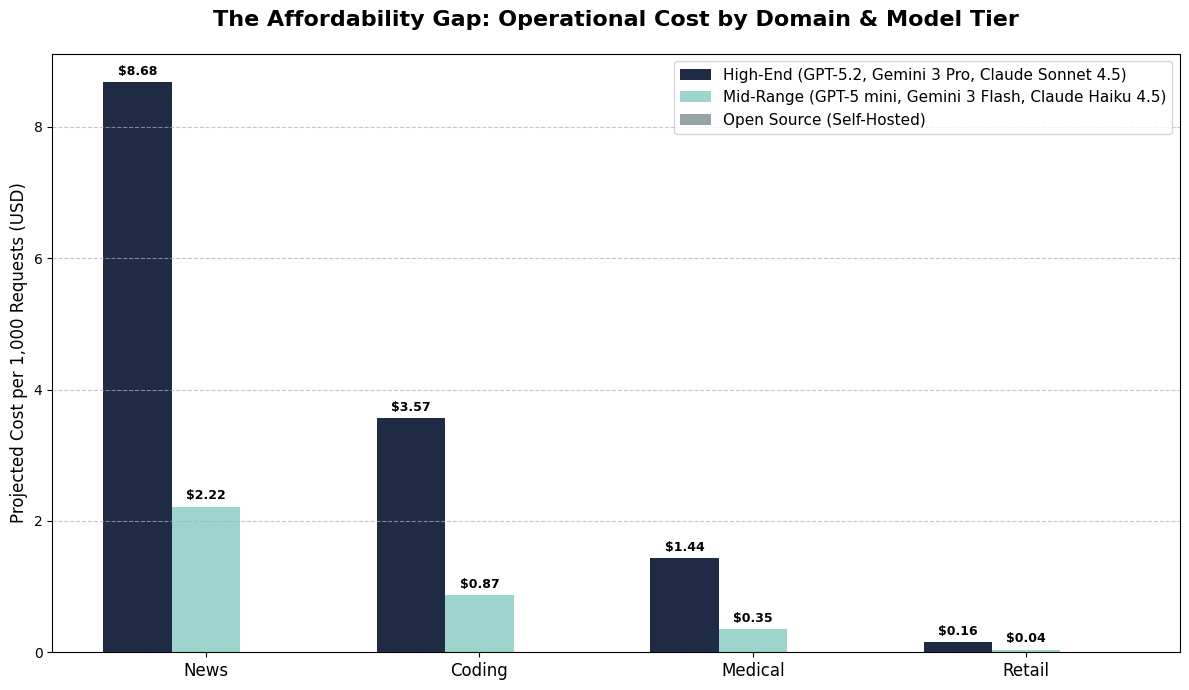

In [4]:
# ==========================================
# 3. PLOT THE GRAPH
# ==========================================

x = np.arange(len(domains))  # Label locations
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 7))

# Create bars for each pricing tier
# We shift the bars slightly so they group together
rects1 = ax.bar(x - width, costs_per_model[model_names[0]], width, label=model_names[0], color='#1F2A44') # Dark Blue
rects2 = ax.bar(x,        costs_per_model[model_names[1]], width, label=model_names[1], color='#9ED4CE') # Blue
rects3 = ax.bar(x + width, costs_per_model[model_names[2]], width, label=model_names[2], color='#95a5a6') # Grey

# Add styling text
ax.set_ylabel('Projected Cost per 1,000 Requests (USD)', fontsize=12)
ax.set_title('The Affordability Gap: Operational Cost by Domain & Model Tier', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(domains, fontsize=12)
ax.legend(fontsize=11)

# Add gridlines for readability (y-axis only)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0: # Only label if bar is visible
            ax.annotate(f'${height:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9, fontweight='bold')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.savefig('affordability_gap_chart.png', dpi=300) # Saves the image
plt.show()